In [1]:
a=5
b=10
print(a+b+10)

25


In [2]:
a

5

In [3]:
a=5
b=10
print(a+b+10)

25


In [4]:
import tensorflow as tf

tf.config.list_physical_devices()

2023-06-02 00:04:57.199240: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 00:04:58.613636: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-02 00:04:58.613903: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/soumik/anaconda3/pkgs/cuda-nvcc
2023-06-02 00:04:58.613913: W tensorflow/compiler/tf

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.activations import relu,selu
from tensorflow.keras.datasets import cifar10

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
labels={0:"airplane",
1:"automobile",
2:"bird",
3:"cat",
4:"deer",
5:"dog",
6:"frog",
7:"horse",
8:"ship",
9:"truck"}

In [8]:
len(x_train)

50000

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

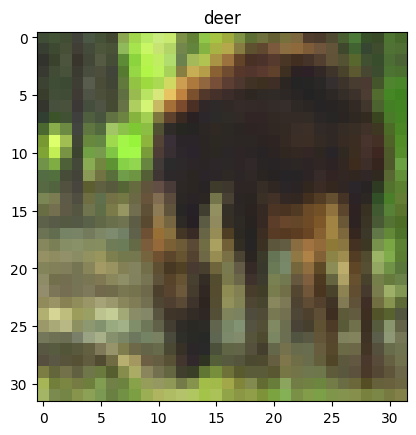

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

n=np.random.randint(0,len(x_train))
img=Image.fromarray(x_train[n])
plt.title(labels[y_train[n][0]])
# plt.axes("off")
plt.imshow(img)

In [11]:
x_train=x_train/225.
x_test=x_test/255.

In [12]:
x_train[0].shape

(32, 32, 3)

In [13]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# tf.random.set_seed(42)

# #preprocess the data (getting all pixel values between 0 & 1)

# train_datagen=ImageDataGenerator(rescale=1./255) #max pixel value=255
# valid_datagen=ImageDataGenerator(rescale=1./255)

# train_datagen.flow(x_train,batch_size=32,class_mode="categorical",seed=42)
# valid_datagen.flow(x_test,batch_size=32,class_mode="categorical",seed=42)

In [14]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3,padding="same"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3,padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

2023-06-02 00:05:03.126122: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 00:05:03.127216: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 00:05:03.127413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 00:05:03.127541: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

In [15]:
model.compile(optimizer=Adam(0.003),loss=SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 10)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 10)         0         
 2D)                                                    

In [17]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

2023-06-02 00:05:04.848032: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-06-02 00:05:05.493247: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


2023-06-02 00:05:07.733782: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-06-02 00:05:09.359519: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55bdc7924770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-02 00:05:09.360033: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-06-02 00:05:09.430126: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-02 00:05:09.751709: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 13s 5ms/step - loss: 1.7146 - accuracy: 0.3550 - val_loss: 1.5587 - val_accuracy: 0.4307
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4405 - accuracy: 0.4689 - val_loss: 1.3716 - val_accuracy: 0.4958
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3645 - accuracy: 0.5026 - val_loss: 1.3339 - val_accuracy: 0.5060
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3120 - accuracy: 0.5259 - val_loss: 1.3135 - val_accuracy: 0.5245
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2743 - accuracy: 0.5391 - val_loss: 1.2566 - val_accuracy: 0.5422
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2488 - accuracy: 0.5518 - val_loss: 1.2573 - val_accuracy: 0.5506
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2267 - accuracy: 0.5595 - val_loss: 1.2419 - val_accuracy: 0.5532
Ep

In [18]:
from numba import cuda

device=cuda.select_device(0)
device.reset()

In [19]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
!nvidia-smi

Fri Jun  2 00:06:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.108.03   Driver Version: 510.108.03   CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   58C    P8     3W /  N/A |      7MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------